Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [6]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

##### 2. Какое количество уникальных значений у поля InternetService?

In [7]:
df['InternetService'].value_counts()


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [8]:
df['InternetService'].nunique()

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [9]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [10]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PhoneService'].head()

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s+$', np.nan, regex=True)
df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [14]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [15]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [16]:
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingMovies'].head()

0    0
1    0
2    0
3    0
4    0
Name: StreamingMovies, dtype: int64

In [17]:
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingTV'].head()

0    0
1    0
2    0
3    0
4    0
Name: StreamingTV, dtype: int64

In [18]:
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['TechSupport'].head()

0    0
1    0
2    0
3    1
4    0
Name: TechSupport, dtype: int64

##### 8. Заполните пропуски в поле PhoneService значением 0

In [19]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [20]:
df['PhoneService'].describe()

count    7043.000000
mean        0.903166
std         0.295752
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PhoneService, dtype: float64

In [21]:
df['PhoneService'] = df['PhoneService'].fillna(0)

In [22]:
df['PhoneService'].describe()

count    7043.000000
mean        0.903166
std         0.295752
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PhoneService, dtype: float64

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [23]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df1 = pd.DataFrame(df, columns=columns)
df1.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [24]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X = pd.DataFrame(df1, columns=features)
y = pd.DataFrame(df1[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [26]:
gender.fit_transform(X_train, y_train)

,gender_Female,gender_Male
6607,0,1
2598,1,0
2345,1,0
4093,1,0
693,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [27]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [28]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])


Объединение всех "кубиков" очень легко сделать таким образом

In [29]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [30]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('tenure',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler(copy=True,
                                                                                 with_mean=True,
                                                                                 with_std=True))],
                                                          verbose=False)),
                                                ('TotalCharges',
                                                 Pipeline(memory=None,
                        

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [32]:
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:20]

array([0.9       , 0.        , 0.        , 1.        , 0.1       ,
       0.2       , 0.3       , 0.        , 0.3       , 0.39333333,
       0.        , 0.3       , 0.1       , 0.1       , 0.        ,
       1.        , 0.2       , 0.91      , 0.1       , 0.3       ])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [33]:
from sklearn.metrics import roc_auc_score, log_loss, roc_curve

roc_auc_score(y_test, preds)

0.7638337475043888

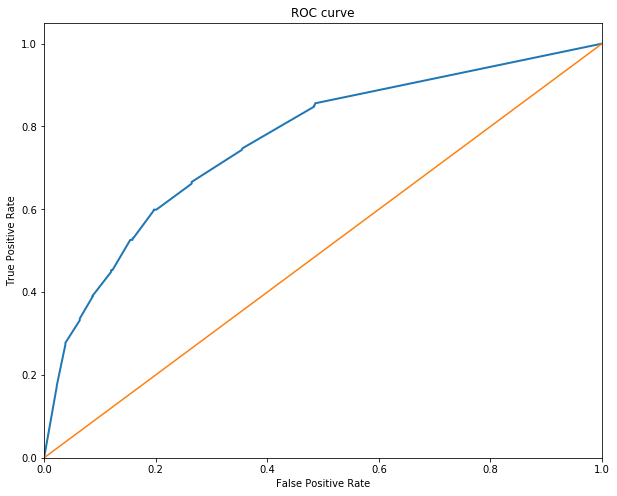

In [35]:
import matplotlib.pyplot as plt #visualization

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [36]:
log_loss(y_test, preds, eps=1e-15)

2.276863095139535

### Сохраним наш пайплайн

In [37]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)